In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('md_stats.csv', index_col=0)
particle_stat = "/home/rathoddinesh/Bit Repos/Chess Seg/data/all_particle_stats.csv"
ps_df = pd.read_csv(particle_stat)
# consider only cp_id and volume
ps_df = ps_df[['cp_id', 'volume', 'cn']]
# filter out cp_id with volume less than 100
ps_df = ps_df[ps_df['volume'] > 100]

df.head(), ps_df.head(), df.shape, ps_df.shape

(                           0         1         2         3         4  \
 grain_3896334.vtp   5.022273  3.865872  3.354215  2.984807  2.757253   
 grain_2284889.vtp   2.725967  1.860510  1.562268  1.383338  1.234078   
 grain_1234271.vtp   7.092956  4.902486  4.231505  3.882635  3.624637   
 grain_1519566.vtp  10.450317  8.122624  7.155652  6.583602  6.063877   
 grain_2280919.vtp  12.390331  9.539618  8.420097  7.485782  6.848413   
 
                           5         6         7         8  
 grain_3896334.vtp  2.580759  2.438835  2.321870  2.233408  
 grain_2284889.vtp  1.147330  1.077306  1.030948  0.972430  
 grain_1234271.vtp  3.403823  3.221512  3.042172  2.911218  
 grain_1519566.vtp  5.580395  5.325148  5.069662  4.873363  
 grain_2280919.vtp  6.418976  6.090514  5.819014  5.572099  ,
      cp_id        volume  cn
 0  3896334    689.946681   2
 2  1234271   1666.127357   4
 4  1519566   8269.200079   8
 5  2280919  11284.377905   8
 6  2132008   1892.932333   2,
 (6811, 9),


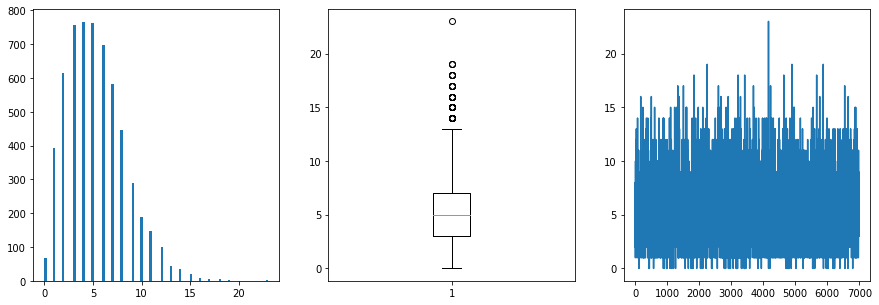

In [31]:
cns = ps_df['cn']
# histogram, percentiles and boxplot of cn
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(cns, bins=100)
ax[1].boxplot(cns)
ax[2].plot(cns)
plt.show()

In [32]:
# filter out cp_id with cn less than 15
ps_df = ps_df[ps_df['cn'] > 12]

# name the index column
df.index.name = 'cp_id'
# index col contains grain_cpid.vtp
df.index = df.index.str.replace('.vtp', '', regex=False)
df.index = df.index.str.replace('grain_', '', regex=False)
df.index = df.index.astype(int)
# print column types including index
print(df.dtypes, df.index.dtype)

# consider only rows with cp_id in ps_df
df = df[df.index.isin(ps_df['cp_id'])]
df.head(), df.shape

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object int64


(                 0          1          2         3         4         5  \
 cp_id                                                                    
 1228256  16.637768  11.250028   9.188921  8.221224  7.610717  7.078371   
 3387614  17.310629  11.581908   9.747245  8.811118  7.914455  7.404092   
 974929   17.314859  12.831037  10.770346  9.268545  8.224371  7.592460   
 773595   16.587774  12.962443  10.936464  9.452271  8.776819  8.145662   
 3742320  17.284975  12.997184  11.230856  9.877251  9.038872  8.458008   
 
                 6         7         8  
 cp_id                                  
 1228256  6.698675  6.380387  6.134868  
 3387614  6.968686  6.604863  6.352037  
 974929   7.084830  6.711290  6.441129  
 773595   7.677483  7.313868  7.012781  
 3742320  7.972470  7.635131  7.344588  ,
 (121, 9))

In [33]:
# take abs diff of each column from first column
df = df.sub(df.iloc[:, 0], axis=0).abs()
# drop first column
df = df.drop(df.columns[0], axis=1)
df.head()

,1,2,3,4,5,6,7,8
cp_id,,,,,,,,
1228256,5.387740,7.448847,8.416543,9.027051,9.559397,9.939092,10.257381,10.502899
3387614,5.728721,7.563384,8.499511,9.396174,9.906537,10.341943,10.705766,10.958592
974929,4.483822,6.544513,8.046314,9.090488,9.722399,10.230028,10.603569,10.873729
773595,3.625331,5.651310,7.135503,7.810954,8.442112,8.910291,9.273906,9.574993
3742320,4.287791,6.054119,7.407724,8.246103,8.826967,9.312505,9.649844,9.940387


# Kmeans Clustering

In [34]:
# df copy without index
X = df.copy().reset_index(drop=True)
# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.head()

,1,2,3,4,5,6,7,8
0,5.387740,7.448847,8.416543,9.027051,9.559397,9.939092,10.257381,10.502899
1,5.728721,7.563384,8.499511,9.396174,9.906537,10.341943,10.705766,10.958592
2,4.483822,6.544513,8.046314,9.090488,9.722399,10.230028,10.603569,10.873729
3,3.625331,5.651310,7.135503,7.810954,8.442112,8.910291,9.273906,9.574993
4,4.287791,6.054119,7.407724,8.246103,8.826967,9.312505,9.649844,9.940387


In [35]:
X_scaled[:5]

array([[ 1.49085423,  1.56866445,  1.44664001,  1.33467238,  1.31162722,
         1.2694517 ,  1.24072646,  1.20809394],
       [ 1.78743489,  1.65217668,  1.50286537,  1.57290127,  1.52835998,
         1.51488136,  1.50844236,  1.4761437 ],
       [ 0.7046394 ,  0.9092931 ,  1.19574289,  1.37561424,  1.4133954 ,
         1.44669955,  1.44742385,  1.42622535],
       [-0.04206431,  0.25803724,  0.57850551,  0.5498144 ,  0.61406316,
         0.64267297,  0.65352613,  0.6622772 ],
       [ 0.53413436,  0.55173477,  0.76298413,  0.8306555 ,  0.85434306,
         0.88771442,  0.87798611,  0.87721049]])

In [36]:
# kmeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_scaled)
# cluster labels
labels = kmeans.labels_
# cluster centers
centers = kmeans.cluster_centers_

In [37]:
# add cluster labels to df
df['cluster'] = labels
df.head()

,1,2,3,4,5,6,7,8,cluster
cp_id,,,,,,,,,
1228256,5.387740,7.448847,8.416543,9.027051,9.559397,9.939092,10.257381,10.502899,1
3387614,5.728721,7.563384,8.499511,9.396174,9.906537,10.341943,10.705766,10.958592,1
974929,4.483822,6.544513,8.046314,9.090488,9.722399,10.230028,10.603569,10.873729,5
773595,3.625331,5.651310,7.135503,7.810954,8.442112,8.910291,9.273906,9.574993,2
3742320,4.287791,6.054119,7.407724,8.246103,8.826967,9.312505,9.649844,9.940387,5


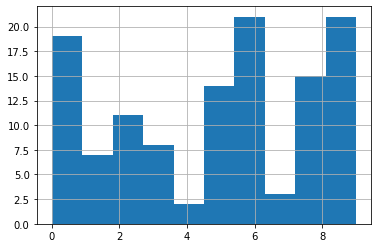

In [38]:
# plot histogram of cluster sizes
df['cluster'].hist()
plt.show()

* 0 - particles with few undersegmented particles
* 1 - particles with elongated in 1 direction with few undersegmented particles
* 2 - rod like particles
* 3 - particles with few undersegmented particles
* 4 - Bar like particles
* 5 - thin particles(along one dimension)
* 6 - Bigger particles with undersegmentation
* 7 - particles that are elongated in 1 direction
* 8 - few undersegmented particles
* 9 - big particles with few undersegmentation

In [49]:
cluster_2 = df[df['cluster'] == 5]
cluster_2, cluster_2.shape

(                1         2         3         4         5          6  \
 cp_id                                                                  
 974929   4.483822  6.544513  8.046314  9.090488  9.722399  10.230028   
 3742320  4.287791  6.054119  7.407724  8.246103  8.826967   9.312505   
 3345838  4.678762  6.637416  7.912837  8.652755  9.276235   9.798206   
 988677   5.119516  6.552109  7.667694  8.507797  8.953431   9.380821   
 3401340  4.734274  6.623406  8.020365  8.813484  9.403807   9.874917   
 1353112  5.394807  6.892458  7.794063  8.512259  9.025348   9.426316   
 3052843  4.924840  6.742245  7.970035  8.544638  8.990760   9.415952   
 3326446  4.589334  6.294457  7.438648  8.218075  8.856561   9.271617   
 1567567  4.849178  6.363008  7.503231  8.155753  8.688606   9.065012   
 3614110  4.643481  6.421632  7.623525  8.518389  9.088083   9.549084   
 1688534  4.946666  6.368410  7.587714  8.296739  8.847350   9.211731   
 2210797  4.437725  6.393282  7.581675  8.337735  8